In [1]:
#ADDING THE NECESSARY IMPORT STATEMENTS:

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


pd.pandas.set_option("display.max_columns", None)

## Data Reading & Understanding

    1- Here we read the data from the train.csv
    2- Read the data shape,size, attribute features and null values


In [2]:
housedata = pd.read_csv('train.csv')

In [3]:
housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housedata.shape

(1460, 81)

In [5]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
#Checking the statistical features of the given dataset
housedata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#Checking the statistical features of the given dataset in different quartiles
housedata.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,201

In [8]:
housedata.shape

(1460, 81)

In [9]:
#checking for null values if any
housedata.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

## Exploratory Data Analysis

**Missing/Null Values Analysis**

In [10]:
# Checking the percentage of NAN/null values present in each column
col_with_na=[col for col in housedata.columns if housedata[col].isnull().sum()>1]
for col in col_with_na:
    print(col, np.round(housedata[col].isnull().mean(), 2),' % missing values')

LotFrontage 0.18  % missing values
Alley 0.94  % missing values
MasVnrType 0.01  % missing values
MasVnrArea 0.01  % missing values
BsmtQual 0.03  % missing values
BsmtCond 0.03  % missing values
BsmtExposure 0.03  % missing values
BsmtFinType1 0.03  % missing values
BsmtFinType2 0.03  % missing values
FireplaceQu 0.47  % missing values
GarageType 0.06  % missing values
GarageYrBlt 0.06  % missing values
GarageFinish 0.06  % missing values
GarageQual 0.06  % missing values
GarageCond 0.06  % missing values
PoolQC 1.0  % missing values
Fence 0.81  % missing values
MiscFeature 0.96  % missing values


In [11]:
#columns with morethan 45% missing value
housedata.columns[100*housedata.isnull().sum()/len(housedata.index)>45]

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [12]:
#Checking the missing value percentage
round(100*housedata.isnull().sum()/len(housedata.index),2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
                 ...  
CentralAir        0.00
SaleCondition     0.00
Heating           0.00
TotalBsmtSF       0.00
Id                0.00
Length: 81, dtype: float64

So here we can see some missing values present in the dataset

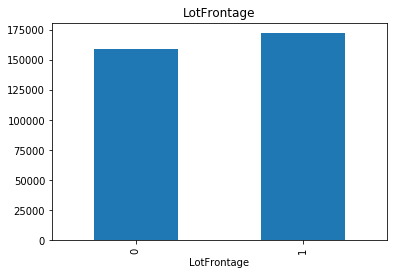

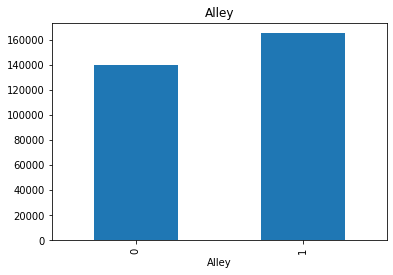

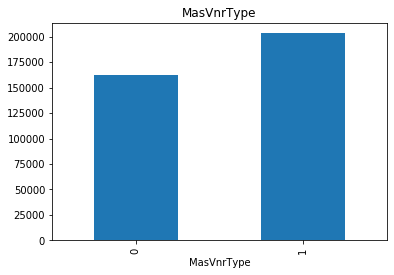

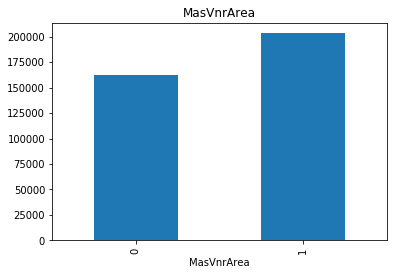

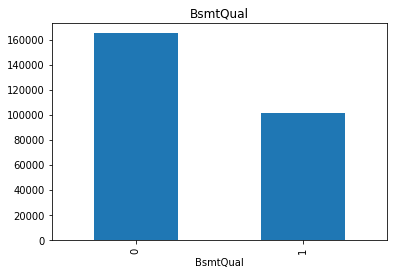

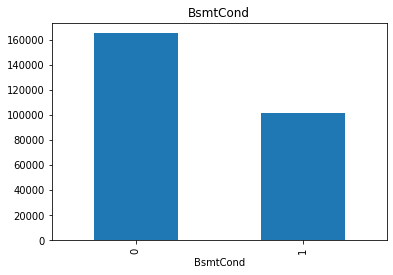

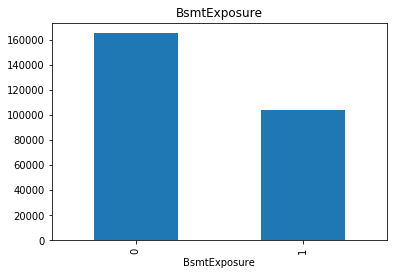

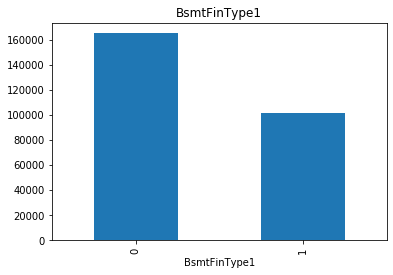

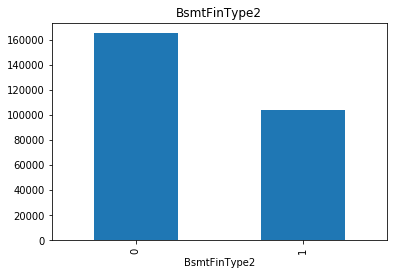

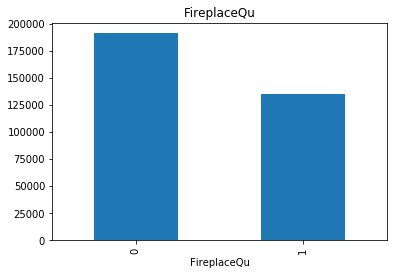

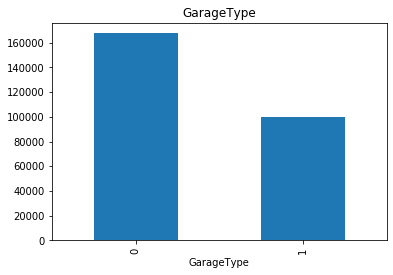

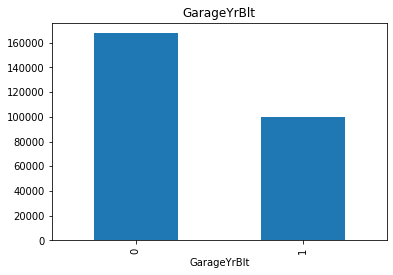

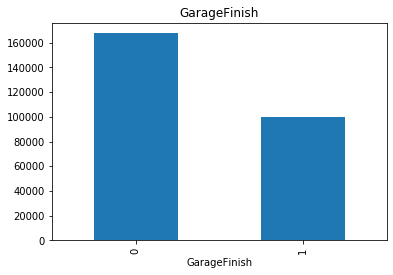

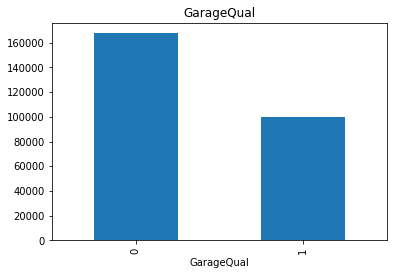

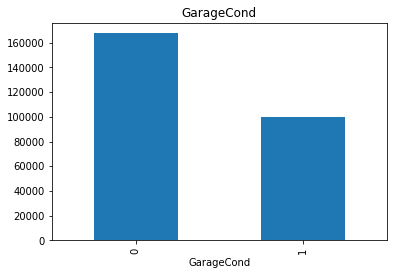

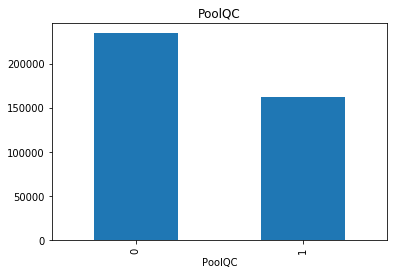

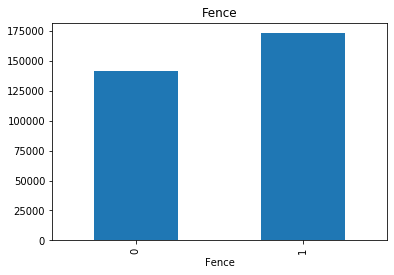

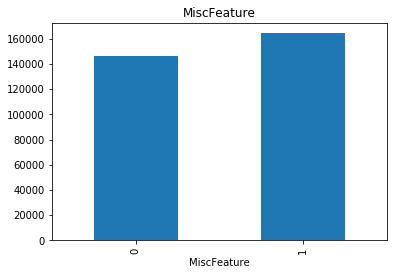

In [13]:
#Checking the significance of missing values for our target variable
for feature in col_with_na:
    data = housedata.copy()
    
# we have created a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
# here we calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()


Observation:

Here we can see that there is some relation between the missing values and the dependent variable. Therefore we need to replace these NAN/null values with something meaningful.

**Numerical Variables Analysis**

In [14]:
# checking the numerical variables present in the dataset
numerical_features = [feature for feature in housedata.columns if housedata[feature].dtypes != 'object']
print('Total Number of numerical variables present in the dataset: ', len(numerical_features))
housedata[numerical_features].head()

Total Number of numerical variables present in the dataset:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [15]:
numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [16]:
# list of variables that contain year information
year_col = [col for col in numerical_features if 'Yr' in col or 'Year' in col]
year_col

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

**Categorical Variables Analysis**

In [17]:
#checking for catergorical features in the given dataset
categorical_features=[feature for feature in housedata.columns if housedata[feature].dtypes=='object']
print('Total Number of categorical variables present in the dataset: ', len(categorical_features))

Total Number of categorical variables present in the dataset:  43


In [18]:
housedata[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [19]:
for feature in categorical_features:
    print('Feature:{} & no.of categories present:{}'.format(feature,len(housedata[feature].unique())))

Feature:MSZoning & no.of categories present:5
Feature:Street & no.of categories present:2
Feature:Alley & no.of categories present:3
Feature:LotShape & no.of categories present:4
Feature:LandContour & no.of categories present:4
Feature:Utilities & no.of categories present:2
Feature:LotConfig & no.of categories present:5
Feature:LandSlope & no.of categories present:3
Feature:Neighborhood & no.of categories present:25
Feature:Condition1 & no.of categories present:9
Feature:Condition2 & no.of categories present:8
Feature:BldgType & no.of categories present:5
Feature:HouseStyle & no.of categories present:8
Feature:RoofStyle & no.of categories present:6
Feature:RoofMatl & no.of categories present:8
Feature:Exterior1st & no.of categories present:15
Feature:Exterior2nd & no.of categories present:16
Feature:MasVnrType & no.of categories present:5
Feature:ExterQual & no.of categories present:4
Feature:ExterCond & no.of categories present:5
Feature:Foundation & no.of categories present:6
Feature

**Target variable "SalesPrice" analysis**

In [20]:
housedata.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew: 1.8828757597682129


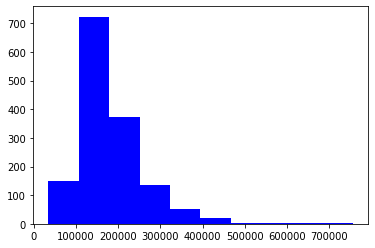

In [21]:
#Check for skewness in the Sales Price variable
#Skewness is a measure of the shape of the distribution of the values of the target variable: SalesPrice

print ("Skew:", housedata.SalePrice.skew())
plt.hist(housedata.SalePrice, color='blue')
plt.show()

**Observations:
    - We can see a longer tail towards the right, hence the distribution is rightly skewed which means there are some houses having really high Sale Price.
    
    - When performing regression, we need to log-transform of the target variable which is skewed in order to improve the linearity of the data.

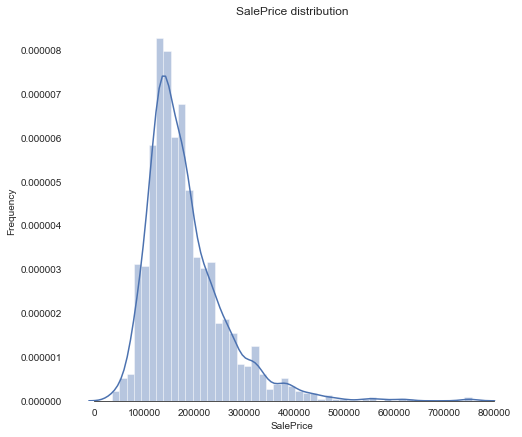

In [22]:
# Sales Price Distribution
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
sns.distplot(housedata['SalePrice'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

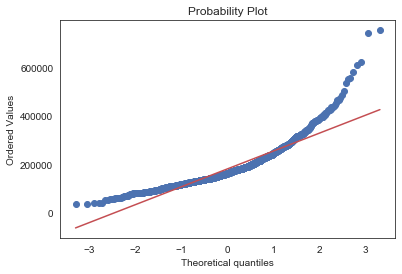

In [23]:
#Probablity plot
fig = plt.figure()
stats.probplot(housedata['SalePrice'], plot=plt)
plt.show()

**Outlier Analysis**

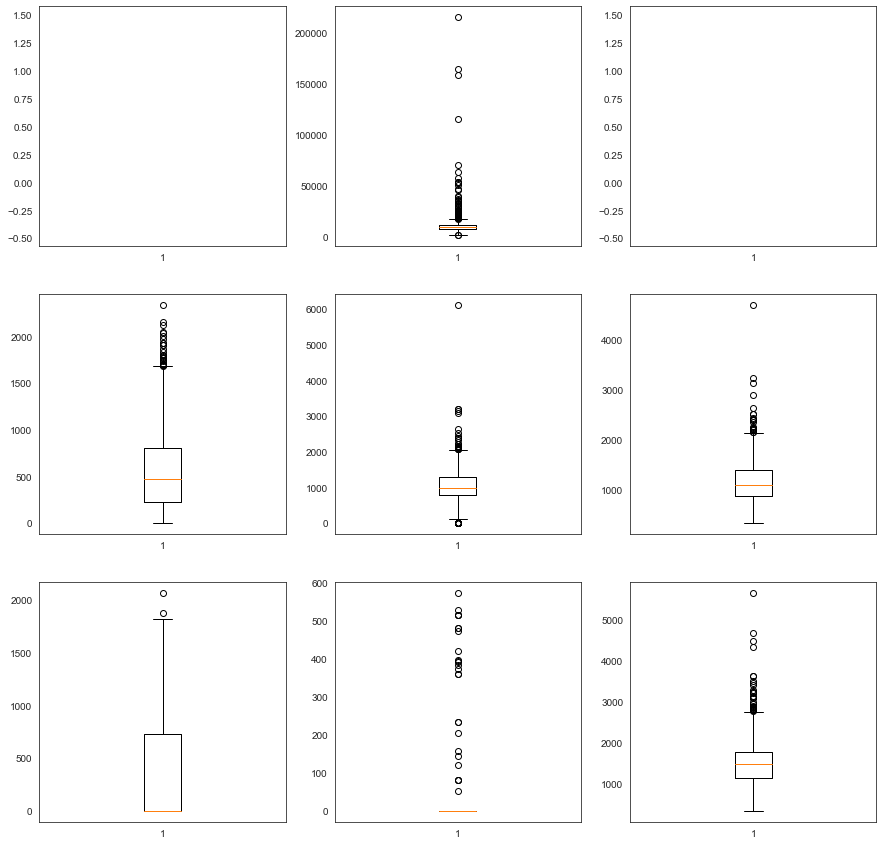

In [24]:
# Checking the outliers in the numeric columns
#boxplots for numeric varaibles
plt.figure(figsize=(15, 15))
plt.subplot(3,3,1)
plt.boxplot(housedata.LotFrontage)
plt.subplot(3,3,2)
plt.boxplot(housedata.LotArea)
plt.subplot(3,3,3)
plt.boxplot(housedata.MasVnrArea)
plt.subplot(3,3,4)
plt.boxplot(housedata.BsmtUnfSF)
plt.subplot(3,3,5)
plt.boxplot(housedata.TotalBsmtSF)
plt.subplot(3,3,6)
plt.boxplot(housedata['1stFlrSF'])
plt.subplot(3,3,7)
plt.boxplot(housedata['2ndFlrSF'])
plt.subplot(3,3,8)
plt.boxplot(housedata.LowQualFinSF)
plt.subplot(3,3,9)
plt.boxplot(housedata.GrLivArea)
plt.show()


### Data Cleaning & Preparation

**Missing value treatment**

In [25]:
#Columns with missing values more than 1 as seen earlier
col_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

Based on data dictionary:
    # NA in PoolQC means 'No Pool'
    # NA in Fence means 'No Fence'
    # NA in MiscFeature means 'none'
    # NA in Alley means 'No alley access'
    # NA in FireplaceQu means 'No Fireplace'
    # NA in BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 means ''No Basement'
    # NA in MasVnrType means 'none'
    # MasVnrType type is 'none' area will 0
    # NA in GarageType,GarageFinish,GarageQual,GarageCond means 'No Garage'
So we convert the values accordingly to replace the NA values

In [26]:
# housedata.loc[housedata['PoolQC'].isnull(),['PoolQC']] = 'No Pool'
# housedata.loc[housedata['Fence'].isnull(),['Fence']] = 'No Fence'
# housedata.loc[housedata['MiscFeature'].isnull(),['MiscFeature']] = 'none'
# housedata.loc[housedata['Alley'].isnull(),['Alley']] = 'No alley access'
# housedata.loc[housedata['FireplaceQu'].isnull(),['FireplaceQu']] = 'No Fireplace'
# housedata.loc[housedata['BsmtQual'].isnull(),['BsmtQual']] = 'No Basement'
# housedata.loc[housedata['BsmtCond'].isnull(),['BsmtCond']] = 'No Basement'
# housedata.loc[housedata['BsmtExposure'].isnull(),['BsmtExposure']] = "No Basement"
# housedata.loc[housedata['BsmtFinType1'].isnull(),['BsmtFinType1']] = 'No Basement'
# housedata.loc[housedata['BsmtFinType2'].isnull(),['BsmtFinType2']] = 'No Basement'
# housedata.loc[housedata['MasVnrType'].isnull(),['MasVnrType']] = 'none'
# housedata.loc[housedata['MasVnrArea'].isnull(),['MasVnrArea']] = 0

In [27]:
# Replace NA with None in the following columns below : 

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    housedata[col]=housedata[col].fillna('None')

In [28]:
# housedata.loc[housedata['GarageType'].isnull(),['GarageType']] = 'No Garage'
# housedata.loc[housedata['GarageFinish'].isnull(),['GarageFinish']] = 'No Garage'
# housedata.loc[housedata['GarageQual'].isnull(),['GarageQual']] = 'No Garage'
# housedata.loc[housedata['GarageCond'].isnull(),['GarageCond']] = 'No Garage'

In [29]:
#missing percentage in LotFrontage column
100*housedata['LotFrontage'].isnull().sum()/len(housedata.index)

17.73972602739726

In [30]:
#replacing the missing values with mean for LotFrontage column
housedata["LotFrontage"].replace(np.nan, housedata["LotFrontage"].mean(),inplace=True)

In [31]:
# Checking the percentage of NAN/null values present in each column after imputing if any rounding to 7 decimals
col_with_na1=[col for col in housedata.columns if housedata[col].isnull().sum()>0]
for col in col_with_na1:
    print(col, np.round(housedata[col].isnull().mean(), 7),' % missing values')

MasVnrArea 0.0054795  % missing values
GarageYrBlt 0.0554795  % missing values


Still we can see some missing values in the columns "ELectrical" & "GarageYrBlt"

In [32]:
housedata['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
None        1
Mix         1
Name: Electrical, dtype: int64

In [33]:
housedata['Electrical'].isnull().sum()

0

In [34]:
# here decision was taken to impute GarageYrBlt with 2019 so that while calculating age it will it will turn to 0
# age = 2019-2019 = 0
housedata.loc[housedata['GarageYrBlt'].isnull(),['GarageYrBlt']] = 2019

In [35]:
#lets again check if there are any columns with missing values
housedata.columns[100*housedata.isnull().sum()/len(housedata.index)>0]

Index(['MasVnrArea'], dtype='object')

In [36]:
#Once again to confirm we have no missing values, we check the missing percentage here again if any is present
col_with_na2=[col for col in housedata.columns if housedata[col].isnull().sum()>0]
for col in col_with_na2:
    print(col, np.round(housedata[col].isnull().mean(), 7),' % missing values')

MasVnrArea 0.0054795  % missing values


Since it returns no values we can be sure as there are no missing values now. Hence missing values treatment has been completed

In [37]:
housedata.shape

(1460, 81)

In [38]:
#drop any duplicates if present
housedata=housedata.drop_duplicates()
housedata.shape

(1460, 81)

No duplicates found in our dataset as the shape of the data after performing the drop duplicate operation remians the same

In [39]:
#Dropping ID column as it is not relevant for our analysis
housedata.drop(['Id'],axis=1,inplace=True)

In [40]:
housedata.shape

(1460, 80)

In [41]:
#converting to correct datatype for some variables
housedata['MSSubClass'] = housedata['MSSubClass'].astype('object')
housedata['OverallCond'] = housedata['OverallCond'].astype('object')
housedata['YrSold'] = housedata['YrSold'].astype('object')
housedata['MoSold'] = housedata['MoSold'].astype('object')

**Creating Derived variables from the dataset**

In [42]:
#New variable creation TotalSF i.e combination of TotalBsmtSF, 1stFlrSF, 2ndFlrSF
# housedata['TotalSF'] = housedata['TotalBsmtSF'] + housedata['1stFlrSF'] + housedata['2ndFlrSF']
#house["house_age_when_sold_in_month"] = (((house["YrSold"]-1) - house["YearBuilt"])*12) + house["MoSold"]
# derive house age = 2019 - year build
housedata["House_age"] = 2019 - housedata["YearBuilt"]
# derive garage age = 2019 - year build
housedata["Garage_age"] = 2019 - housedata["GarageYrBlt"]
# derive gap b/w house build and remodel = YearRemodAdd - year build
housedata["Gap_between_build_remodel"] = housedata["YearRemodAdd"] - housedata["YearBuilt"]

In [43]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
housedata['BuiltOrRemodelAge'] = housedata.apply(getBuiltOrRemodelAge, axis=1)
housedata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,House_age,Garage_age,Gap_between_build_remodel,BuiltOrRemodelAge
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,16,16.0,0,5
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,43,43.0,0,31
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,18,18.0,1,6
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,104,21.0,55,36
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,19,19.0,0,8


In [44]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we 
# would only be using the derived columns for further analysis

housedata.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

**Dealing with Numeric Variables**

In [45]:
#creating the numeric variables dataframe out of the numerical variables present in the dataset
house_numeric_features = housedata.select_dtypes(include=['float64','int64'])

In [46]:
house_numeric_features.head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,House_age,Garage_age,Gap_between_build_remodel,BuiltOrRemodelAge
0,65.0,8450,7,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500,16,16.0,0,5
1,80.0,9600,6,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500,43,43.0,0,31
2,68.0,11250,7,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500,18,18.0,1,6
3,60.0,9550,7,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000,104,21.0,55,36
4,84.0,14260,8,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000,19,19.0,0,8


In [47]:
house_numeric_features.shape

(1460, 34)

In [48]:
print(len(house_numeric_features.columns))

34


In [49]:
corr = house_numeric_features.corr()
corr

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,House_age,Garage_age,Gap_between_build_remodel,BuiltOrRemodelAge
LotFrontage,1.000000,0.306795,0.234196,0.179700,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,-0.006419,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.334901,-0.117598,-0.025036,-0.075316,-0.082329
LotArea,0.306795,1.000000,0.105806,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843,-0.014228,0.049824,-0.005926,-0.014709
OverallQual,0.234196,0.105806,1.000000,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.790982,-0.572323,-0.388760,-0.241731,-0.552570
MasVnrArea,0.179700,0.104160,0.411876,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493,-0.315707,-0.189496,-0.237414,-0.180183
BsmtFinSF1,0.215828,0.214103,0.239666,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420,-0.249503,-0.101284,-0.199531,-0.127556
BsmtFinSF2,0.043340,0.111170,-0.059119,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378,0.049107,0.095592,0.003443,0.069814
BsmtUnfSF,0.122156,-0.002618,0.308159,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479,-0.149040,-0.161719,-0.031127,-0.183830
TotalBsmtSF,0.363358,0.260833,0.537808,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581,-0.391452,-0.233034,-0.237527,-0.292096
1stFlrSF,0.414266,0.299475,0.476224,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852,-0.281986,-0.156040,-0.145203,-0.241310
2ndFlrSF,0.072483,0.050986,0.295493,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,0.687501,-0.169494,-0.023855,0.421378,0.609707,0.502901,0.059306,0.616423,0.194561,0.183926,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334,-0.010308,-0.042731,0.105388,-0.141903


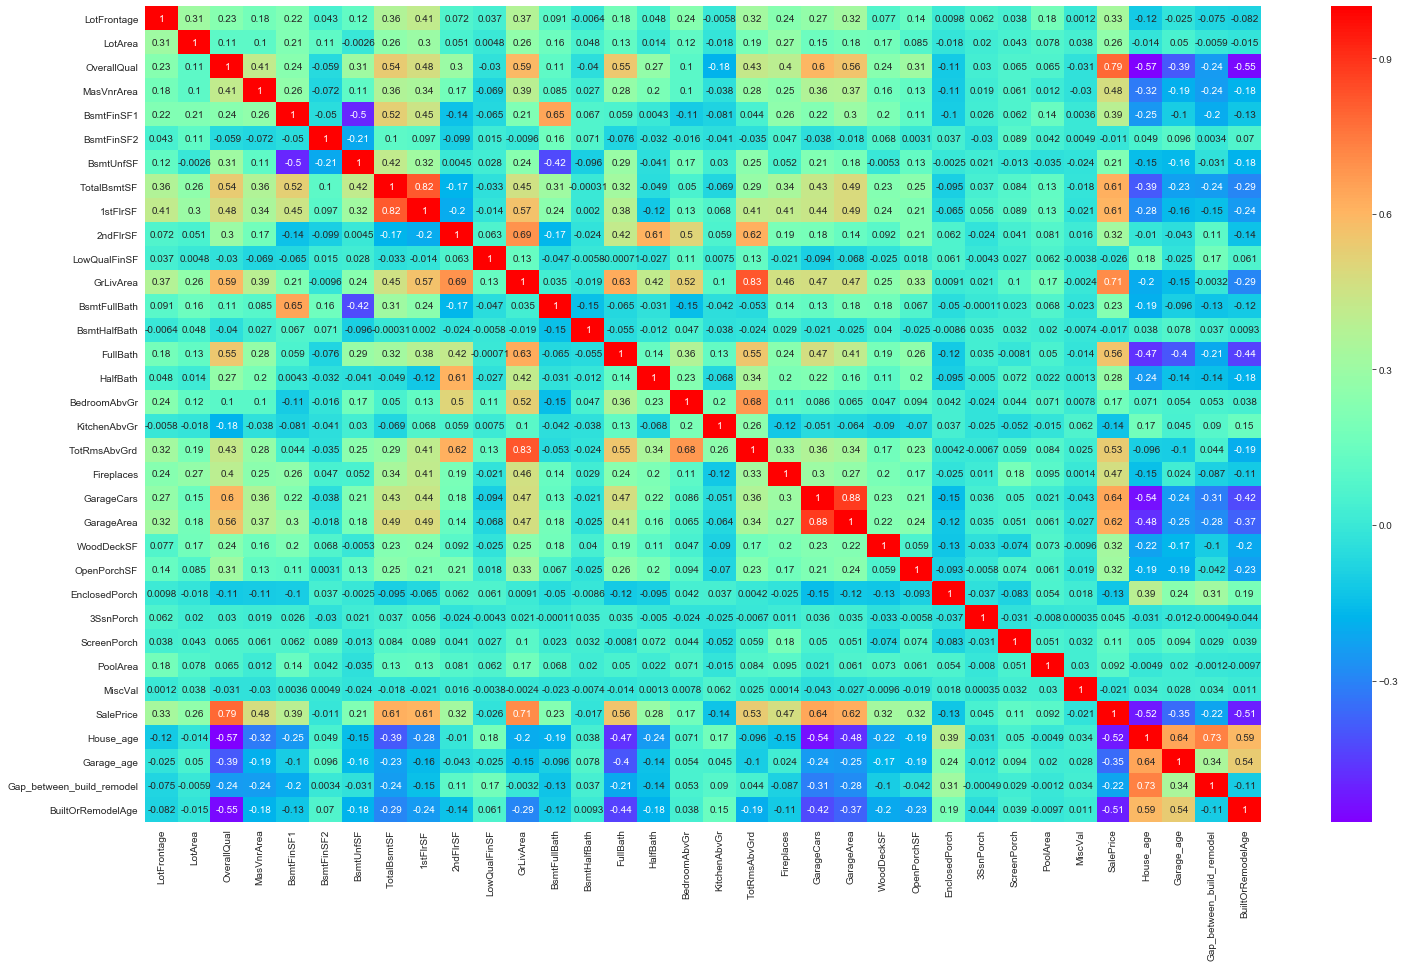

In [50]:
# plotting a heatmap
plt.figure(figsize = (25, 15))
g=sns.heatmap(corr, cmap="rainbow",annot=True)
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5,top - 0.5)
plt.show()

In [51]:
# Removing the highly correlated variables

housedata.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [52]:
house_numeric_features = housedata.select_dtypes(include=['float64','int64'])
house_numeric_features.shape

(1460, 32)

<Figure size 2880x2160 with 0 Axes>

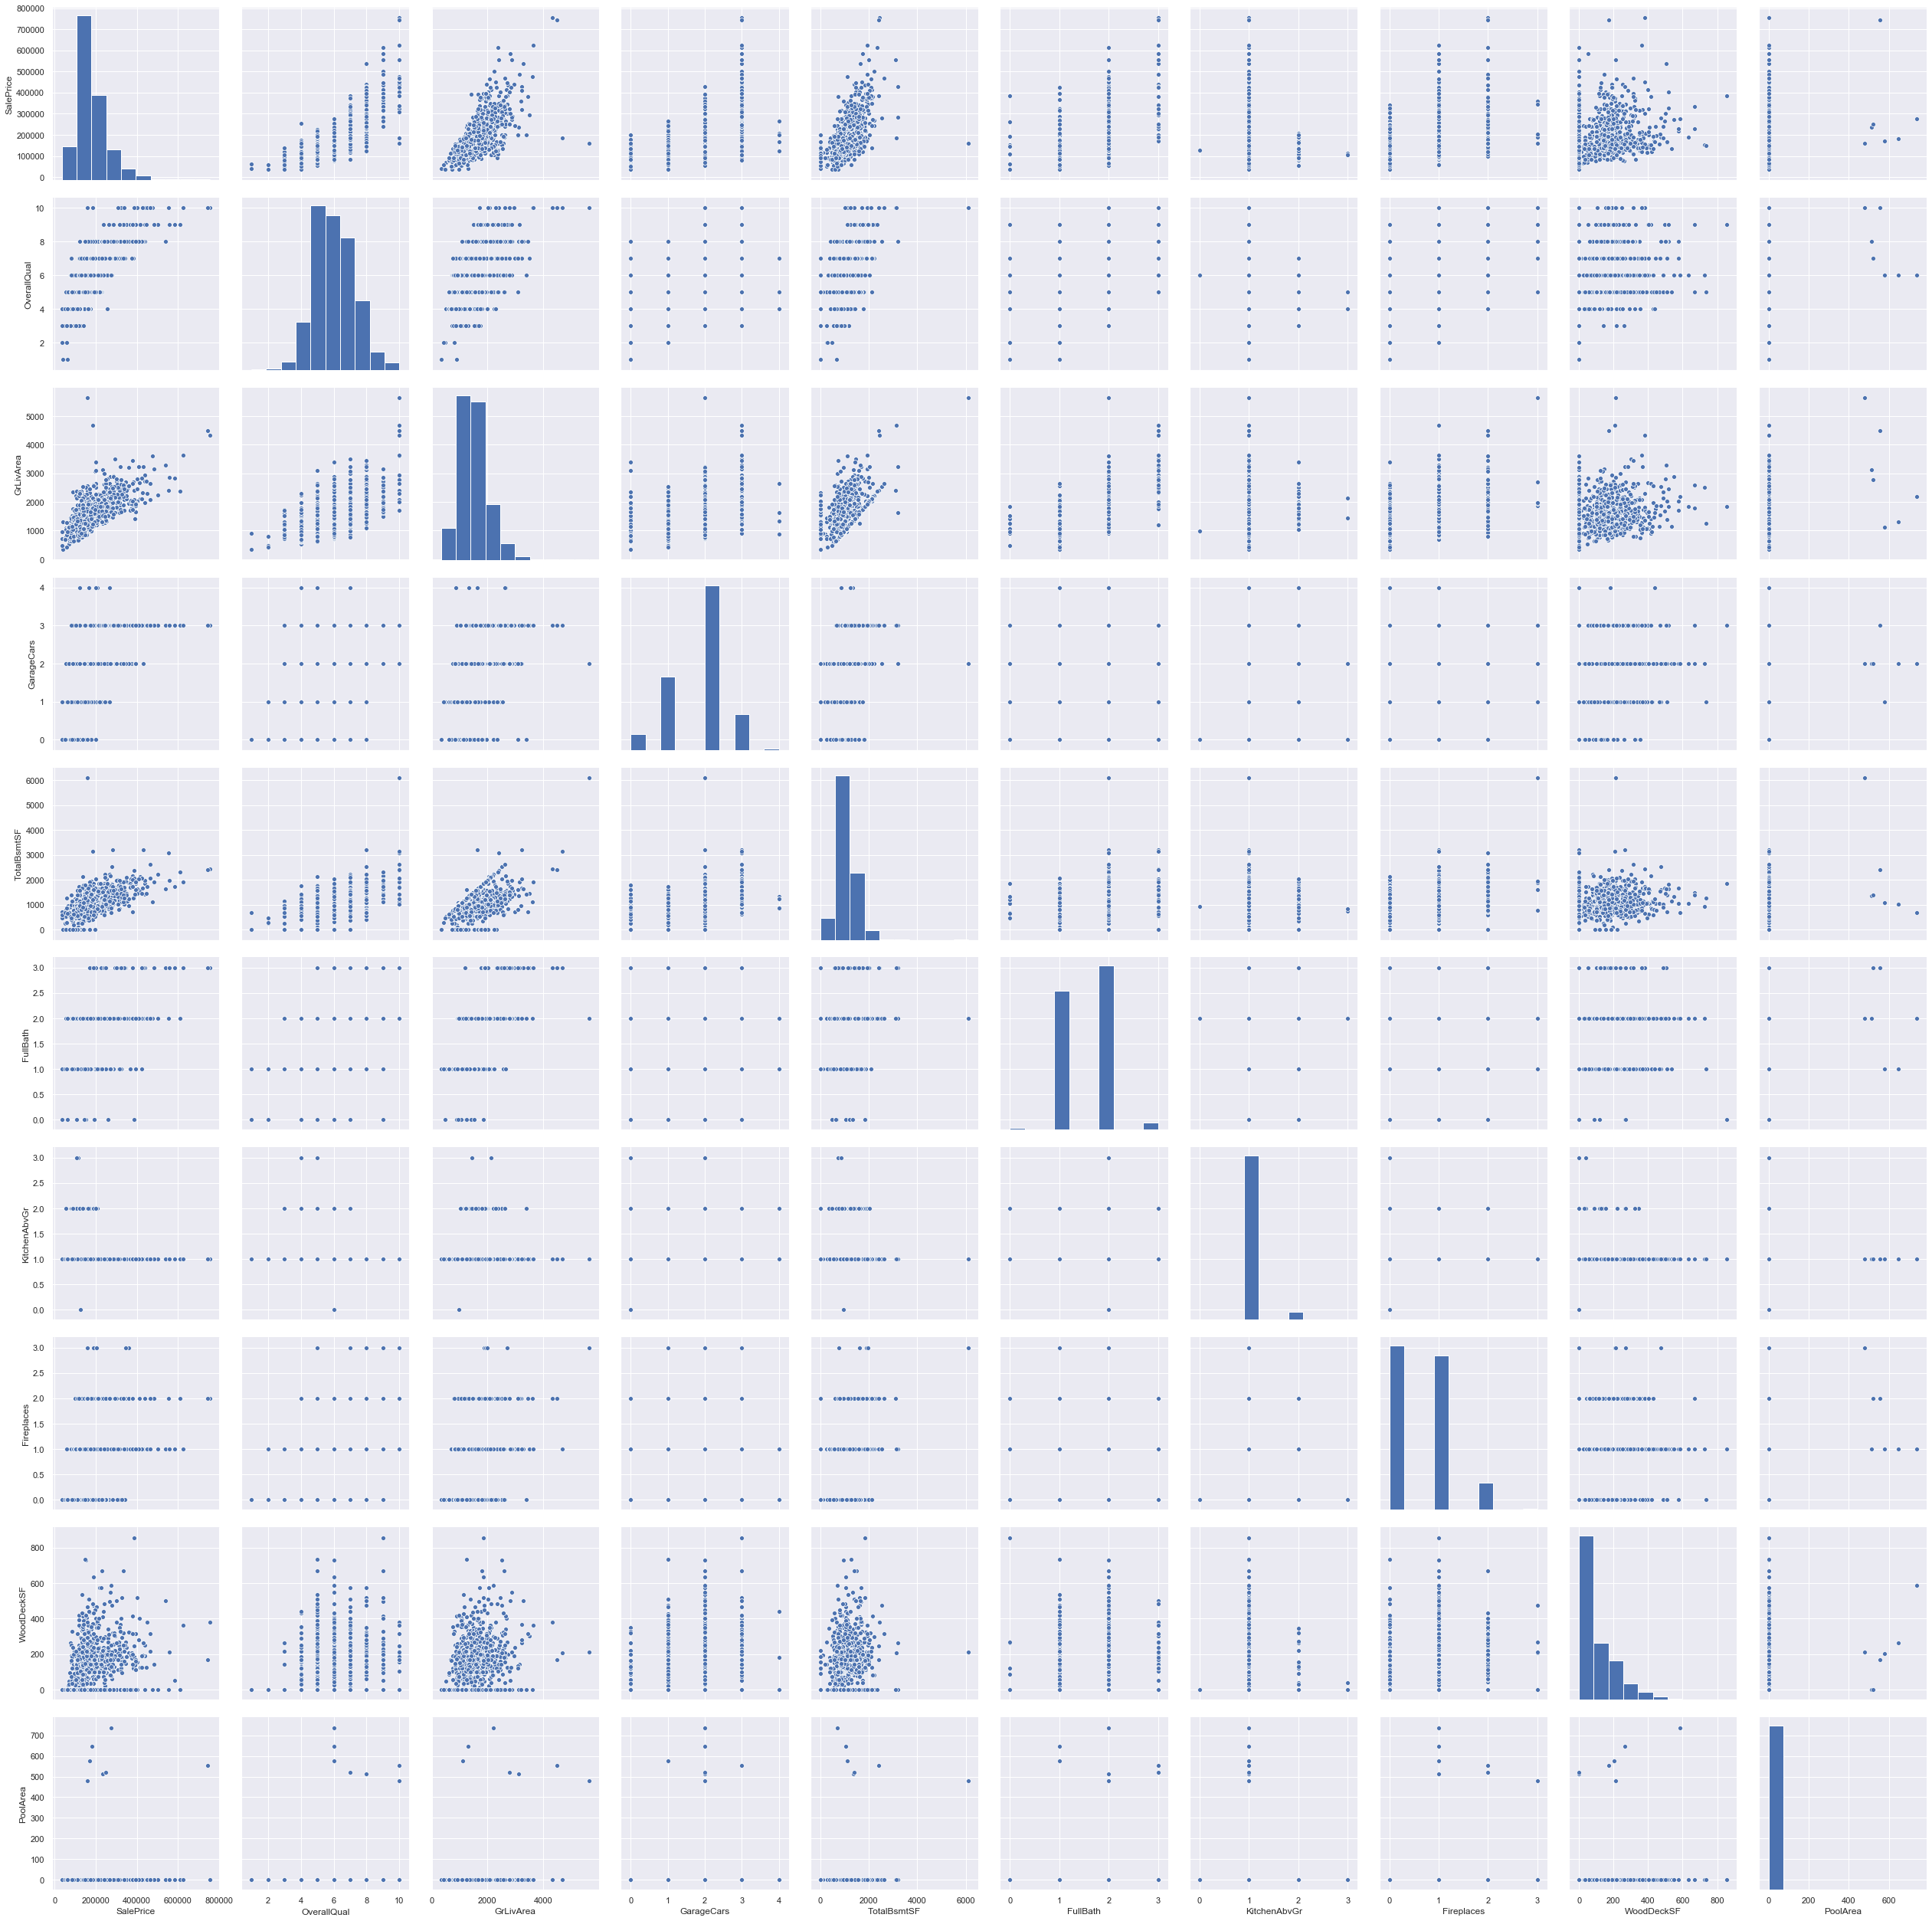

In [53]:
#Scatter plot for some of the numeric variables to check the relationship
sns.set()
plt.figure(figsize=(40, 30))
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath',
        'KitchenAbvGr','Fireplaces','WoodDeckSF','PoolArea']
sns.pairplot(housedata[cols], size = 3.5)
plt.show();

**Checking the distribution of each of the numerical variables in the dataset using distplot**

In [54]:
# for col in house_numeric_features.columns:
#     plt.figure(figsize=(8,5))
#     sns.distplot(housedata[col])

In [55]:
house_numeric_features.drop(['Fireplaces'], axis=1,inplace=True)
house_numeric_features.head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,House_age,Garage_age,Gap_between_build_remodel,BuiltOrRemodelAge
0,65.0,8450,7,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,2,0,61,0,0,0,0,0,208500,16,16.0,0,5
1,80.0,9600,6,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,2,298,0,0,0,0,0,0,181500,43,43.0,0,31
2,68.0,11250,7,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,2,0,42,0,0,0,0,0,223500,18,18.0,1,6
3,60.0,9550,7,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,3,0,35,272,0,0,0,0,140000,104,21.0,55,36
4,84.0,14260,8,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,3,192,84,0,0,0,0,0,250000,19,19.0,0,8


In [56]:
house_numeric_features.shape

(1460, 31)

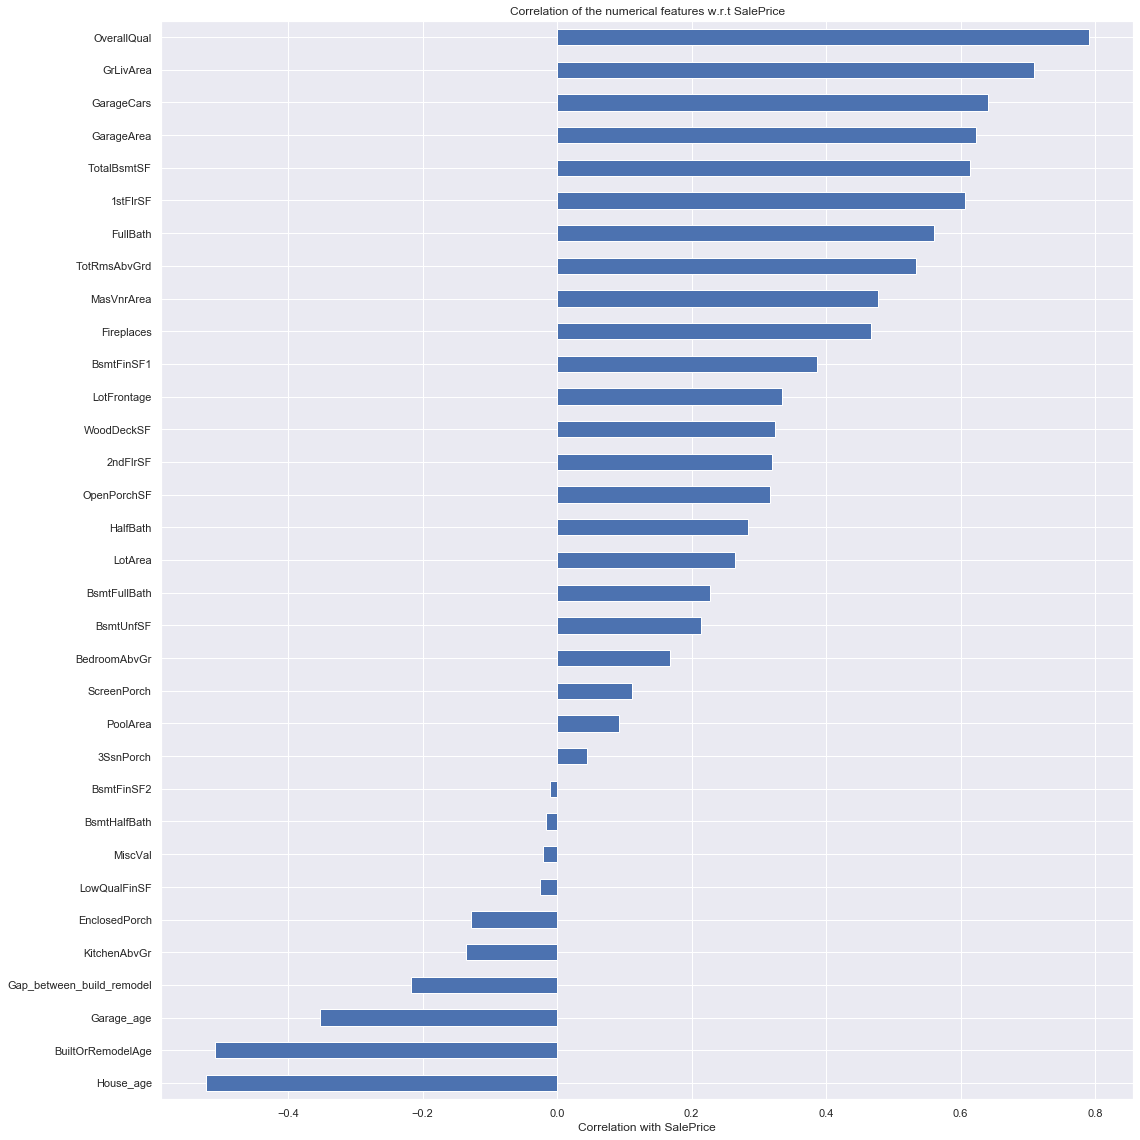

In [57]:
#Plotting to check each numerical variables correlation w.r.t the target variable "SalesPrice"
plt.figure(figsize=(16,16));
corr["SalePrice"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of the numerical features w.r.t SalePrice")
plt.xlabel("Correlation with SalePrice")
plt.tight_layout()
plt.show()

**Remove numerical attributes that have more than 85% data associated to one value.**
- We will remove any column that has one value repeating 1241 times (1241/1460)*100 = 85%) as this column would be skewed to one value

In [58]:
# Drop the following columns that have more than 85% values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def getHighNumericalValueCounts():
    column = []
    numerical_columns = housedata.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(housedata[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
housedata.drop(columnsToBeRemoved, axis = 1, inplace = True)

housedata.drop(['MoSold'], axis = 1, inplace = True)

housedata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice,House_age,Garage_age,Gap_between_build_remodel,BuiltOrRemodelAge
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,2,1,3,Gd,Typ,0,None,Attchd,RFn,2,TA,TA,Y,0,61,None,None,None,WD,Normal,208500,16,16.0,0,5
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,2,0,3,TA,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,298,0,None,None,None,WD,Normal,181500,43,43.0,0,31
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,2,1,3,Gd,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,0,42,None,None,None,WD,Normal,223500,18,18.0,1,6
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,1,0,3,Gd,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,0,35,None,None,None,WD,Abnorml,140000,104,21.0,55,36
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,2,1,4,Gd,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,192,84,None,None,None,WD,Normal,250000,19,19.0,0,8


In [59]:
housedata.shape

(1460, 68)

In [60]:
house_numeric_features = housedata.select_dtypes(include=['float64','int64'])
house_numeric_features.shape

(1460, 23)

**Outlier Treatment : Checking Outliers & taking neccessary action**

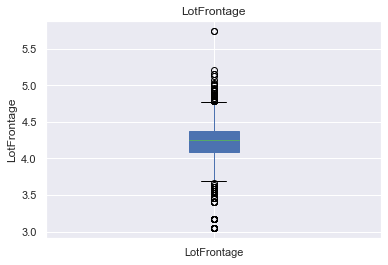

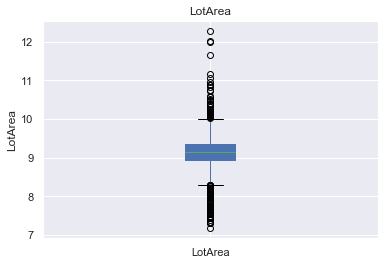

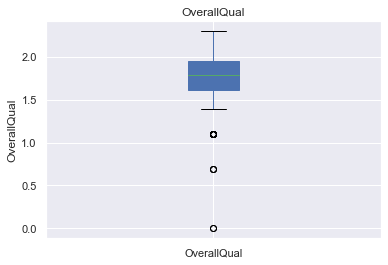

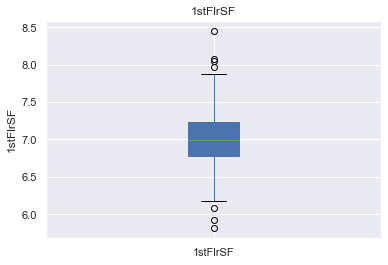

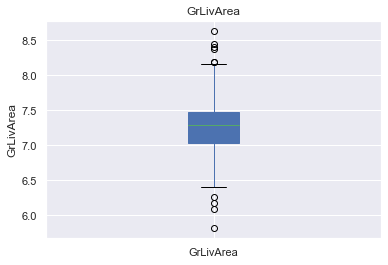

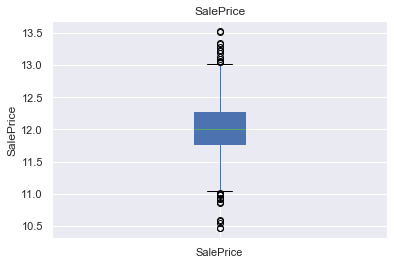

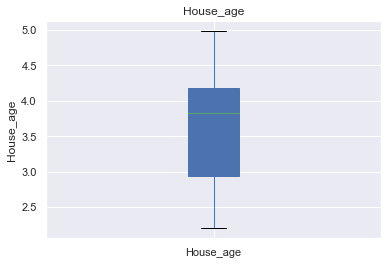

In [61]:
for feature in house_numeric_features:
    data=housedata.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature,patch_artist=True)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [62]:
# Checking outliers at the quantiles : 25%,50%,75%,90%,95% and above

house_numeric_features.describe(percentiles=[.25,.5,.75,.90,.95,0.98,.99])

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,House_age,Garage_age,Gap_between_build_remodel,BuiltOrRemodelAge
count,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,103.685262,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,0.613014,1.767123,94.244521,46.660274,180921.195890,47.732192,38.247260,13.597945,22.950000
std,22.024023,9981.264932,1.382997,181.066207,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,0.644666,0.747315,125.338794,66.256028,79442.502883,30.202904,25.724002,24.476465,20.640653
min,21.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,9.000000,0.000000,0.000000,-1.000000
25%,60.000000,7553.500000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,129975.000000,19.000000,16.000000,0.000000,4.000000
50%,70.049958,9478.500000,6.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,1.000000,2.000000,0.000000,25.000000,163000.000000,46.000000,34.500000,0.000000,14.000000
75%,79.000000,11601.500000,7.000000,166.000000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,1.000000,2.000000,168.000000,68.000000,214000.000000,65.000000,57.000000,20.000000,41.000000
90%,92.000000,14381.700000,8.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,1.000000,2.000000,1.000000,4.000000,1.000000,3.000000,262.000000,130.000000,278000.000000,94.100000,71.000000,51.000000,56.000000
95%,104.000000,17401.150000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,1.000000,2.000000,1.000000,4.000000,2.000000,3.000000,335.000000,175.050000,326100.000000,103.000000,89.000000,73.000000,58.000000
98%,120.820000,25251.620000,9.000000,650.980000,1442.640000,1678.200000,2001.640000,2072.280000,1318.560000,2782.380000,1.000000,3.000000,1.000000,4.000000,2.000000,3.000000,430.100000,240.820000,394931.060000,110.640000,99.000000,88.000000,59.000000


We consider the below variables for our outlier treatment:
- MasVnrArea
- LotArea
- TotalBsmtSF
- WoodDeckSF
- OpenPorchSF

In [63]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = housedata['LotArea'].quantile(0.98)
housedata = housedata[housedata["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = housedata['MasVnrArea'].quantile(0.98)
housedata = housedata[housedata["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = housedata['TotalBsmtSF'].quantile(0.99)
housedata = housedata[housedata["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = housedata['WoodDeckSF'].quantile(0.99)
housedata = housedata[housedata["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = housedata['OpenPorchSF'].quantile(0.99)
housedata = housedata[housedata["OpenPorchSF"] < nn_quartile_OpenPorchSF]

In [64]:
housedata.shape

(1352, 68)

In [65]:
# Determine the percentage of data retained

num_data = round(100*(len(housedata)/1460),2)
print(num_data)

92.6


**Outlier treatment on the variable SalePrice**

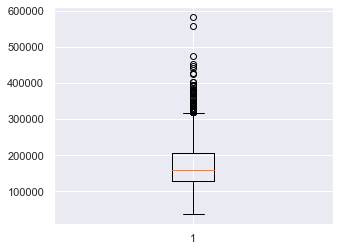

In [66]:
#Boxplot of SalesPrice to check outliers in the data
plt.figure(figsize=(5,4))
plt.boxplot(housedata['SalePrice'])
plt.show()

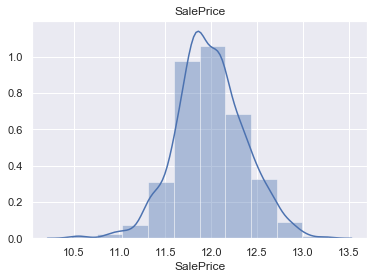

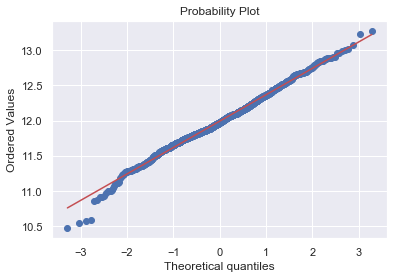

In [67]:
# Log Transformation of SalesPrice variable

housedata['SalePrice'] = np.log1p(housedata['SalePrice'])
plt.title('SalePrice')
sns.distplot(housedata['SalePrice'], bins=10)
plt.show()

# # Distribution is now more fitted to a normal distribution after log-transformation
res = stats.probplot(housedata['SalePrice'],plot = plt)

    -The target value seems to be normalized with some noise.
    -QQ-plot confirms values are more linearly distributed after transformation.


**Dealing with categorical columns**

In [68]:

# Dropping the columns that have more than 85% values associated to a specific value to avoid skewness

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = housedata.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(housedata[col].value_counts().max() >= 1149):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()
housedata.drop(columnsToBeRemoved, axis = 1, inplace = True)

housedata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,House_age,Garage_age,Gap_between_build_remodel,BuiltOrRemodelAge
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,0,None,Attchd,RFn,2,0,61,None,Normal,12.247699,16,16.0,0,5
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,1,TA,Attchd,RFn,2,298,0,None,Normal,12.109016,43,43.0,0,31
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,1,TA,Attchd,RFn,2,0,42,None,Normal,12.317171,18,18.0,1,6
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,1,Gd,Detchd,Unf,3,0,35,None,Abnorml,11.849405,104,21.0,55,36
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,1,TA,Attchd,RFn,3,192,84,None,Normal,12.429220,19,19.0,0,8


In [69]:
housedata.shape

(1352, 47)

In [70]:
#  Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

housedata['d_LotShape'] = housedata['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housedata['d_ExterQual'] = housedata['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housedata['d_BsmtQual'] = housedata['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housedata['d_BsmtExposure'] = housedata['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housedata['d_BsmtFinType1'] = housedata['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
housedata['d_HeatingQC'] = housedata['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housedata['d_KitchenQual'] = housedata['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housedata['d_FireplaceQu'] = housedata['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housedata['d_GarageFinish'] = housedata['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housedata['d_BldgType'] = housedata['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
housedata['d_HouseStyle'] = housedata['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
housedata['d_Fence'] = housedata['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
housedata['d_LotConfig'] = housedata['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
housedata['d_MasVnrType'] = housedata['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
housedata['d_SaleCondition'] = housedata['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})

In [71]:
housedata.shape

(1352, 62)

In [72]:
# drop the old columns from which the new columns were derived
# We can also drop the id column as it will not be used any more

housedata = housedata.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

housedata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,House_age,Garage_age,Gap_between_build_remodel,BuiltOrRemodelAge,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,196.0,PConc,706,150,856,856,854,1710,1,2,1,3,0,Attchd,2,0,61,12.247699,16,16.0,0,5,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,0.0,CBlock,978,284,1262,1262,0,1262,0,2,0,3,1,Attchd,2,298,0,12.109016,43,43.0,0,31,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,162.0,PConc,486,434,920,920,866,1786,1,2,1,3,1,Attchd,2,0,42,12.317171,18,18.0,1,6,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,0.0,BrkTil,216,540,756,961,756,1717,1,1,0,3,1,Detchd,3,0,35,11.849405,104,21.0,55,36,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,350.0,PConc,655,490,1145,1145,1053,2198,1,2,1,4,1,Attchd,3,192,84,12.429220,19,19.0,0,8,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1


In [73]:
housedata.shape

(1352, 47)

**Creating Dummy Variables**

In [74]:
# Creating dummies for MSZoning,RoofStyle, Exterior1st,Exterior2nd, Foundation, GarageType

d_MSZoning = pd.get_dummies(housedata['MSZoning'], prefix='MSZoning', drop_first = True)
housedata = pd.concat([housedata, d_MSZoning], axis = 1)

d_RoofStyle = pd.get_dummies(housedata['RoofStyle'], prefix='RoofStyle', drop_first = True)
housedata = pd.concat([housedata, d_RoofStyle], axis = 1)

d_Exterior1st = pd.get_dummies(housedata['Exterior1st'], prefix='Exterior1st', drop_first = True)
housedata = pd.concat([housedata, d_Exterior1st], axis = 1)

d_Exterior2nd = pd.get_dummies(housedata['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
housedata = pd.concat([housedata, d_Exterior2nd], axis = 1)

d_Foundation = pd.get_dummies(housedata['Foundation'], prefix='Foundation', drop_first = True)
housedata = pd.concat([housedata, d_Foundation], axis = 1)

d_GarageType = pd.get_dummies(housedata['GarageType'], prefix='GarageType', drop_first = True)
housedata = pd.concat([housedata, d_GarageType], axis = 1)

housedata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,House_age,Garage_age,Gap_between_build_remodel,BuiltOrRemodelAge,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,196.0,PConc,706,150,856,856,854,1710,1,2,1,3,0,Attchd,2,0,61,12.247699,16,16.0,0,5,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,0.0,CBlock,978,284,1262,1262,0,1262,0,2,0,3,1,Attchd,2,298,0,12.109016,43,43.0,0,31,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,162.0,PConc,486,434,920,920,866,1786,1,2,1,3,1,Attchd,2,0,42,12.317171,18,18.0,1,6,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,0.0,BrkTil,216,540,756,961,756,1717,1,1,0,3,1,Detchd,3,0,35,11.849405,104,21.0,55,36,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,350.0,PConc,655,490,1145,1145,1053,2198,1,2,1,4,1,Attchd,3,192,84,12.429220,19,19.0,0,8,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [75]:
d_Neighborhood = pd.get_dummies(housedata['Neighborhood'], prefix='Neighborhood', drop_first = True)
housedata = pd.concat([housedata, d_Neighborhood], axis = 1)

In [76]:
housedata.shape

(1352, 120)

In [77]:
housedata = housedata.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
'GarageType'], axis=1)

housedata.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,House_age,Garage_age,Gap_between_build_remodel,BuiltOrRemodelAge,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,65.0,8450,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,0,2,0,61,12.247699,16,16.0,0,5,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,2,298,0,12.109016,43,43.0,0,31,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,1,2,0,42,12.317171,18,18.0,1,6,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,756,1717,1,1,0,3,1,3,0,35,11.849405,104,21.0,55,36,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,3,192,84,12.429220,19,19.0,0,8,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [78]:
housedata.shape

(1352, 113)

### Train Test Split

In [79]:
# Putting all feature variable to X

X = housedata.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,House_age,Garage_age,Gap_between_build_remodel,BuiltOrRemodelAge,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,65.0,8450,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,0,2,0,61,16,16.0,0,5,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,2,298,0,43,43.0,0,31,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,1,2,0,42,18,18.0,1,6,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,756,1717,1,1,0,3,1,3,0,35,104,21.0,55,36,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,3,192,84,19,19.0,0,8,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [80]:
X.shape

(1352, 112)

In [81]:
# Putting response variable to y

y = housedata['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [82]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1352 entries, 0 to 1458
Columns: 113 entries, MSSubClass to Neighborhood_Veenker
dtypes: float64(4), int64(34), object(2), uint8(73)
memory usage: 529.4+ KB


In [83]:
housedata.dtypes

MSSubClass               object
LotFrontage             float64
LotArea                   int64
OverallQual               int64
OverallCond              object
                         ...   
Neighborhood_SawyerW      uint8
Neighborhood_Somerst      uint8
Neighborhood_StoneBr      uint8
Neighborhood_Timber       uint8
Neighborhood_Veenker      uint8
Length: 113, dtype: object

**Feature Scaling**

In [84]:
from sklearn.preprocessing import scale
# scaling the variables (the dataframe is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker'],
      dtype='object', length=112)

In [85]:
# split into train and test
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

**RFE**

In [86]:
# Here we chose to run RFE with the 50 variables 

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [87]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,LotFrontage,True,1
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,BsmtFinSF1,True,1
5,BsmtUnfSF,True,1
6,TotalBsmtSF,True,1
7,1stFlrSF,True,1
8,2ndFlrSF,True,1
9,GrLivArea,True,1


In [88]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [89]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

### MODEL BUILDING

**RIDGE REGRESSION**

In [90]:

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [91]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002320,0.001016,0.000883,0.000128,0.0001,{'alpha': 0.0001},-0.086616,-0.082345,-0.085717,-0.084952,-0.071759,-0.082282,0.005448,25,-0.074337,-0.073968,-0.073706,-0.073338,-0.076740,-0.074418,0.001206
1,0.001642,0.000068,0.000749,0.000038,0.001,{'alpha': 0.001},-0.086616,-0.082344,-0.085716,-0.084952,-0.071760,-0.082282,0.005447,24,-0.074336,-0.073968,-0.073706,-0.073338,-0.076740,-0.074418,0.001206
2,0.001594,0.000063,0.000782,0.000086,0.01,{'alpha': 0.01},-0.086616,-0.082337,-0.085712,-0.084942,-0.071768,-0.082280,0.005443,23,-0.074336,-0.073968,-0.073706,-0.073339,-0.076740,-0.074418,0.001206
3,0.001669,0.000141,0.000793,0.000068,0.1,{'alpha': 0.1},-0.086624,-0.082279,-0.085666,-0.084864,-0.071843,-0.082260,0.005402,22,-0.074339,-0.073977,-0.073707,-0.073347,-0.076741,-0.074422,0.001204
4,0.002064,0.000351,0.000940,0.000268,0.2,{'alpha': 0.2},-0.086641,-0.082232,-0.085619,-0.084796,-0.071911,-0.082244,0.005366,21,-0.074345,-0.073987,-0.073714,-0.073357,-0.076743,-0.074429,0.001201


In [92]:
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
22,20,-0.075266,-0.081553,1
23,50,-0.075911,-0.081572,2
21,10,-0.074910,-0.081703,3
20,9,-0.074867,-0.081732,4
19,8,-0.074823,-0.081765,5
18,7,-0.074789,-0.081802,6
17,6,-0.074755,-0.081842,7
16,5,-0.074717,-0.081887,8
15,4,-0.074675,-0.081941,9
24,100,-0.076830,-0.081968,10


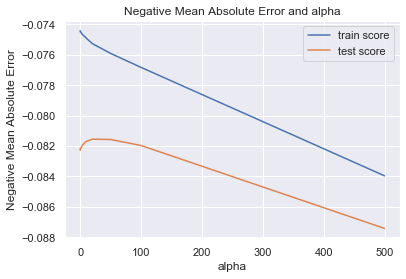

In [93]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [94]:
# get the best estimator for lambda(hyperparameter)

ridge_model_cv.best_estimator_

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [95]:
# check the coefficient values with lambda = 20

alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.00693288,  0.02430135,  0.07614607,  0.0458961 ,  0.01820722,
       -0.01563091,  0.05048564,  0.03839447,  0.04246502,  0.06140323,
        0.00861377,  0.00783267,  0.0330237 ,  0.01202823,  0.00838821,
       -0.02483247, -0.01463903, -0.0187672 , -0.02836938,  0.01322801,
        0.0134902 ,  0.01446749,  0.01894975, -0.01486061,  0.01442749,
        0.04796658,  0.02119378,  0.06889258,  0.04253699, -0.00583129,
       -0.00982802, -0.01174911, -0.00623481, -0.03033468,  0.0153906 ,
        0.00695101,  0.017836  ,  0.00970722,  0.02681151,  0.00711212,
        0.00771831, -0.01642511,  0.01621546,  0.02605133, -0.00786914,
       -0.00880534,  0.01877287, -0.00986243, -0.00643151,  0.01375077])

In [96]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.013610570137200939

In [97]:

# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotFrontage,0.0069
1,LotArea,0.0243
2,OverallQual,0.0761
3,OverallCond,0.0459
4,BsmtFinSF1,0.0182
5,BsmtUnfSF,-0.0156
6,TotalBsmtSF,0.0505
7,1stFlrSF,0.0384
8,2ndFlrSF,0.0425
9,GrLivArea,0.0614


In [98]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot
ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotFrontage': 0.0069,
 'LotArea': 0.0243,
 'OverallQual': 0.0761,
 'OverallCond': 0.0459,
 'BsmtFinSF1': 0.0182,
 'BsmtUnfSF': -0.0156,
 'TotalBsmtSF': 0.0505,
 '1stFlrSF': 0.0384,
 '2ndFlrSF': 0.0425,
 'GrLivArea': 0.0614,
 'BsmtFullBath': 0.0086,
 'HalfBath': 0.0078,
 'GarageCars': 0.033,
 'WoodDeckSF': 0.012,
 'OpenPorchSF': 0.0084,
 'House_age': -0.0248,
 'Garage_age': -0.0146,
 'Gap_between_build_remodel': -0.0188,
 'BuiltOrRemodelAge': -0.0284,
 'd_BsmtExposure': 0.0132,
 'd_HeatingQC': 0.0135,
 'd_KitchenQual': 0.0145,
 'd_FireplaceQu': 0.0189,
 'd_BldgType': -0.0149,
 'd_SaleCondition': 0.0144,
 'MSZoning_FV': 0.048,
 'MSZoning_RH': 0.0212,
 'MSZoning_RL': 0.0689,
 'MSZoning_RM': 0.0425,
 'RoofStyle_Gable': -0.0058,
 'Exterior1st_BrkComm': -0.0098,
 'Exterior1st_CemntBd': -0.0117,
 'Exterior1st_VinylSd': -0.0062,
 'Exterior1st_Wd Sdng': -0.0303,
 'Exterior2nd_CmentBd': 0.0154,
 'Exterior2nd_VinylSd': 0.007,
 'Exterior2nd_Wd Sdng': 0.0178,
 'Foundation_CBlock': 0.0097,
 'Found

In [99]:
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [100]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
1,OverallQual,True,1,0.0761
13,MSZoning_RL,True,1,0.0689
4,TotalBsmtSF,True,1,0.0505
11,MSZoning_FV,True,1,0.0480
2,OverallCond,True,1,0.0459
6,2ndFlrSF,True,1,0.0425
14,MSZoning_RM,True,1,0.0425
5,1stFlrSF,True,1,0.0384
7,GarageCars,True,1,0.0330
0,LotArea,True,1,0.0243


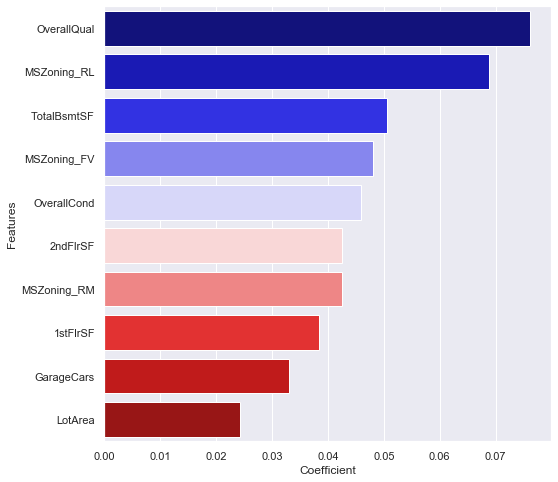

In [101]:
## bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(8,8))
sns.barplot(y = 'Features', x='Coefficient', palette='seismic', data = temp1_df)
plt.show()

In [102]:

from sklearn import metrics 
# model with optimal alpha = 10
lm = Ridge(alpha=20)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9183925423290084
0.9101668062704262


**LASSO REGRESSION**

In [103]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [104]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


,param_alpha,mean_train_score,mean_test_score,rank_test_score
5,0.001,-0.075411,-0.082027,1
6,0.002,-0.076573,-0.082036,2
7,0.003,-0.077051,-0.082161,3
4,0.0005,-0.074949,-0.082200,4
3,0.0004,-0.074823,-0.082210,5
2,0.0003,-0.074695,-0.082240,6
0,0.0001,-0.074513,-0.082285,7
1,0.0002,-0.074601,-0.082304,8
8,0.004,-0.077567,-0.082449,9
9,0.005,-0.078136,-0.082847,10


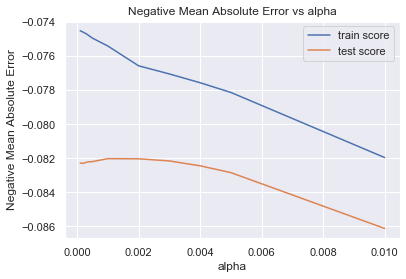

In [105]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error vs alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [106]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [107]:
# check the coefficient values with lambda = 0.0004

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.00605836,  0.02360859,  0.08013271,  0.04646493,  0.0174565 ,
       -0.01697828,  0.05309129,  0.003154  ,  0.        ,  0.10850497,
        0.00716935,  0.00655621,  0.03489945,  0.01112548,  0.00722449,
       -0.05347638, -0.00881221, -0.        , -0.01278433,  0.01272329,
        0.01248256,  0.01301878,  0.01809728, -0.01420193,  0.01446685,
        0.05045442,  0.02089084,  0.07543769,  0.04589291, -0.00490008,
       -0.00932903, -0.        ,  0.        , -0.02488928,  0.00288364,
        0.        ,  0.01160103,  0.00274605,  0.02105652,  0.00480004,
        0.00576084, -0.01229604,  0.01474273,  0.02492516, -0.00667746,
       -0.00714738,  0.01766154, -0.00883703, -0.00503804,  0.01232312])

In [108]:

# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.013338564490175035

In [109]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotFrontage,0.0061
1,LotArea,0.0236
2,OverallQual,0.0801
3,OverallCond,0.0465
4,BsmtFinSF1,0.0175
5,BsmtUnfSF,-0.0170
6,TotalBsmtSF,0.0531
7,1stFlrSF,0.0032
8,GrLivArea,0.1085
9,BsmtFullBath,0.0072


In [110]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotFrontage': 0.0060583554700565315,
 'LotArea': 0.02360858513595302,
 'OverallQual': 0.08013270895613483,
 'OverallCond': 0.046464934689292525,
 'BsmtFinSF1': 0.017456496911753477,
 'BsmtUnfSF': -0.01697828451000663,
 'TotalBsmtSF': 0.05309128630590022,
 '1stFlrSF': 0.0031539981207375834,
 '2ndFlrSF': 0.0,
 'GrLivArea': 0.10850496845545657,
 'BsmtFullBath': 0.007169349480700572,
 'HalfBath': 0.006556206627597734,
 'GarageCars': 0.03489945280142199,
 'WoodDeckSF': 0.011125477449132472,
 'OpenPorchSF': 0.007224493199195143,
 'House_age': -0.05347637921830068,
 'Garage_age': -0.008812208597483514,
 'Gap_between_build_remodel': -0.0,
 'BuiltOrRemodelAge': -0.012784332519394117,
 'd_BsmtExposure': 0.01272329207367014,
 'd_HeatingQC': 0.012482562207068731,
 'd_KitchenQual': 0.013018778922416764,
 'd_FireplaceQu': 0.018097284616018422,
 'd_BldgType': -0.014201930079864256,
 'd_SaleCondition': 0.014466848701337942,
 'MSZoning_FV': 0.05045442196081662,
 'MSZoning_RH': 0.020890838585687643,
 

In [111]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [112]:
# Get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assigning the top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.108505
1,OverallQual,True,1,0.080133
11,MSZoning_RL,True,1,0.075438
4,TotalBsmtSF,True,1,0.053091
9,MSZoning_FV,True,1,0.050454
2,OverallCond,True,1,0.046465
12,MSZoning_RM,True,1,0.045893
6,GarageCars,True,1,0.034899
14,Neighborhood_Crawfor,True,1,0.024925
0,LotArea,True,1,0.023609


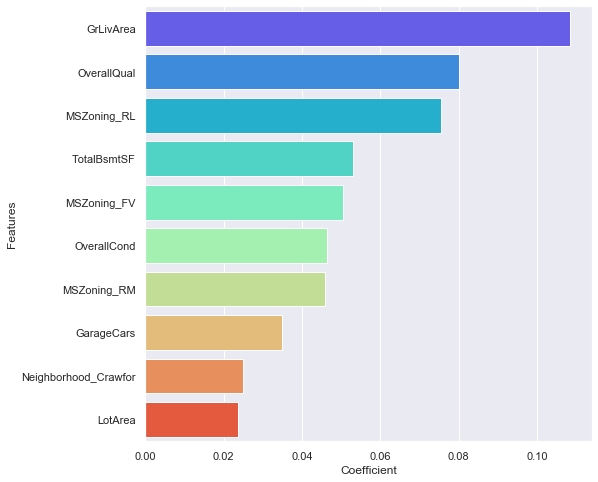

In [113]:
# bar plot to determine the variables that would affect pricing most using ridge regression
plt.figure(figsize=(8,8))
sns.barplot(y = 'Features', x='Coefficient', palette='rainbow', data = temp2_df)
plt.show()

In [114]:
# model with optimal alpha = 0.001
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9177047654794913
0.9119621121054131


## BUILDING MODEL BY DROPPING THE TOP 5 features in Lasso

In [115]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'HalfBath', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'House_age', 'Garage_age', 'Gap_between_build_remodel',
       'BuiltOrRemodelAge', 'd_BsmtExposure', 'd_HeatingQC', 'd_KitchenQual',
       'd_FireplaceQu', 'd_BldgType', 'd_SaleCondition', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'RoofStyle_Gable',
       'Exterior1st_BrkComm', 'Exterior1st_CemntBd', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_CmentBd', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Sdng', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_Stone', 'GarageType_None',
       'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Sawyer', 'Neighborhood

In [116]:
X_train.shape

(946, 50)

**Building a new X_train by dropping the 5 variables**

In [117]:
X_train_new = X_train

In [118]:
X_train_new.head()

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,HalfBath,GarageCars,WoodDeckSF,OpenPorchSF,House_age,Garage_age,Gap_between_build_remodel,BuiltOrRemodelAge,d_BsmtExposure,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_BldgType,d_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,RoofStyle_Gable,Exterior1st_BrkComm,Exterior1st_CemntBd,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,GarageType_None,Neighborhood_BrkSide,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_MeadowV,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_StoneBr
782,1.597357,0.891438,-0.772181,2.144230,-1.012132,0.741440,-0.373800,-0.738539,0.489472,-0.111359,-0.798213,1.262259,1.722109,3.061432,-0.744948,1.844005,1.217395,0.867587,1.664473,0.405238,-0.138063,-0.746538,1.259965,-0.423315,0.324774,-0.209799,-0.109435,-1.905292,2.331972,0.494910,-0.03849,-0.197991,-0.744327,2.543543,-0.197991,-0.731177,2.568172,-0.889229,-0.870705,-0.134433,-0.060926,-0.249115,-0.205926,-0.195965,-0.276465,-0.10592,-0.217371,3.393894,-0.235426,-0.125609
12,0.056250,0.975159,-0.772181,0.362971,0.784779,-0.892714,-0.278599,-0.632824,-0.796473,-1.191050,1.160379,-0.736071,-0.985207,0.505517,-0.744948,0.287869,0.714470,-0.563023,1.088034,-0.566183,-1.180861,-0.746538,-0.967525,-0.423315,0.324774,-0.209799,-0.109435,0.524854,-0.428822,-2.020571,-0.03849,-0.197991,-0.744327,-0.393152,-0.197991,-0.731177,-0.389382,1.124570,-0.870705,-0.134433,-0.060926,-0.249115,-0.205926,-0.195965,-0.276465,-0.10592,-0.217371,-0.294647,4.247617,-0.125609
1212,0.056250,-0.631577,-0.014569,-0.527658,1.913639,-1.118838,0.689285,0.488922,-0.796473,-0.372712,1.160379,-0.736071,0.368451,0.248087,0.175171,-0.672299,-0.407439,-0.563023,-0.305025,-0.566183,-0.138063,0.796764,-0.967525,-0.423315,0.324774,-0.209799,-0.109435,0.524854,-0.428822,0.494910,-0.03849,-0.197991,-0.744327,-0.393152,-0.197991,-0.731177,-0.389382,1.124570,-0.870705,-0.134433,-0.060926,-0.249115,-0.205926,-0.195965,-0.276465,-0.10592,-0.217371,-0.294647,-0.235426,-0.125609
171,-0.306513,0.549091,0.743042,-0.527658,-1.012132,1.874391,0.911422,0.688605,0.918121,1.315376,-0.798213,1.262259,0.368451,1.792668,3.548944,-1.069611,-0.871677,-0.563023,-0.881463,-0.566183,0.904735,0.796764,-0.967525,-0.423315,0.324774,-0.209799,-0.109435,-1.905292,2.331972,0.494910,-0.03849,-0.197991,1.343495,-0.393152,-0.197991,1.367658,-0.389382,-0.889229,1.148494,-0.134433,-0.060926,-0.249115,-0.205926,-0.195965,-0.276465,-0.10592,-0.217371,3.393894,-0.235426,-0.125609
598,-0.821072,-1.507752,1.500654,-0.527658,1.801484,-0.447460,1.329252,1.290589,-0.796473,0.212120,1.160379,-0.736071,1.722109,2.086874,-0.744948,-1.168938,-0.987737,-0.563023,-1.121646,1.376658,0.904735,2.340067,1.259965,2.341527,0.324774,-0.209799,-0.109435,0.524854,-0.428822,-2.020571,-0.03849,-0.197991,1.343495,-0.393152,-0.197991,1.367658,-0.389382,-0.889229,1.148494,-0.134433,-0.060926,-0.249115,-0.205926,-0.195965,-0.276465,-0.10592,-0.217371,-0.294647,-0.235426,-0.125609


In [119]:
X_train_new = X_train_new.drop(['GrLivArea','OverallQual','MSZoning_RL','TotalBsmtSF','MSZoning_FV'], axis=1)

In [120]:
X_train_new.shape

(946, 45)

In [121]:
# Running RFE with the output number of the variable equal to 45

lm = LinearRegression()
lm.fit(X_train_new, y_train)

# running RFE
rfe1 = RFE(lm, 50)            
rfe1 = rfe1.fit(X_train_new, y_train)

In [122]:
# Assign the columns selected by RFE to cols

col1 = X_train_new.columns[rfe1.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df1 = pd.DataFrame(list(zip(X_train_new.columns,rfe1.support_,rfe1.ranking_)), columns=['Variable', 'rfe1_support', 'rfe1_ranking'])
temp_df1 = temp_df1.loc[temp_df1['rfe1_support'] == True]
temp_df1.reset_index(drop=True, inplace=True)

temp_df1

,Variable,rfe1_support,rfe1_ranking
0,LotFrontage,True,1
1,LotArea,True,1
2,OverallCond,True,1
3,BsmtFinSF1,True,1
4,BsmtUnfSF,True,1
5,1stFlrSF,True,1
6,2ndFlrSF,True,1
7,BsmtFullBath,True,1
8,HalfBath,True,1
9,GarageCars,True,1


In [123]:
X_train_rfe1 = X_train_new[col1]

In [124]:
X_train_new = X_train_rfe1[X_train_rfe1.columns]
X_test_new =  X_test[X_train_new.columns]

In [125]:
X_train_new.shape

(946, 45)

In [126]:
lasso1 = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv1 = GridSearchCV(estimator = lasso1,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv1.fit(X_train_new, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [127]:
lasso_cv_results1 = pd.DataFrame(lasso_model_cv1.cv_results_)

lasso_cv_results1[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])



,param_alpha,mean_train_score,mean_test_score,rank_test_score
5,0.001,-0.084986,-0.090468,1
6,0.002,-0.085241,-0.090564,2
4,0.0005,-0.084844,-0.090619,3
3,0.0004,-0.084779,-0.090670,4
0,0.0001,-0.084637,-0.090684,5
2,0.0003,-0.084725,-0.090705,6
1,0.0002,-0.084671,-0.090725,7
7,0.003,-0.085709,-0.090846,8
8,0.004,-0.086257,-0.091217,9
9,0.005,-0.086952,-0.091814,10


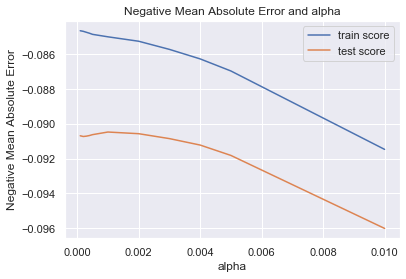

In [128]:
lasso_cv_results1['param_alpha'] = lasso_cv_results1['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results1['param_alpha'], lasso_cv_results1['mean_train_score'])
plt.plot(lasso_cv_results1['param_alpha'], lasso_cv_results1['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [129]:
# get the best estimator for lambda

lasso_model_cv1.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [130]:
alpha = 0.001

lasso1 = Lasso(alpha=alpha)
        
lasso1.fit(X_train_new, y_train) 
lasso1.coef_

array([ 0.00642013,  0.01639111,  0.05248356,  0.04867513,  0.02144593,
        0.11356094,  0.11506529,  0.01041021,  0.00592778,  0.03774469,
        0.00907974,  0.01696536, -0.07809655, -0.01839026, -0.        ,
       -0.01248131,  0.01958914,  0.01491538,  0.03127604,  0.02748089,
       -0.01542021,  0.01632522,  0.0057504 , -0.01484156, -0.00859651,
       -0.00863102, -0.        , -0.00252639, -0.02446251,  0.00677657,
       -0.        ,  0.01621671, -0.00032874,  0.02268947, -0.00565007,
        0.00643286, -0.01753796,  0.01515709,  0.02655928, -0.01332757,
       -0.01764041,  0.02161797, -0.0092882 , -0.00972059,  0.01832309])

In [131]:
lasso_df1 = pd.DataFrame({'Features':X_train_new.columns, 'Coefficient':lasso1.coef_.round(4)})
lasso_df1 = lasso_df1[lasso_df1['Coefficient'] != 0.00]
lasso_df1.reset_index(drop=True, inplace=True)
lasso_df1

,Features,Coefficient
0,LotFrontage,0.0064
1,LotArea,0.0164
2,OverallCond,0.0525
3,BsmtFinSF1,0.0487
4,BsmtUnfSF,0.0214
5,1stFlrSF,0.1136
6,2ndFlrSF,0.1151
7,BsmtFullBath,0.0104
8,HalfBath,0.0059
9,GarageCars,0.0377


In [132]:
lasso_df1.shape

(42, 2)

In [133]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict1 = dict(pd.Series(lasso1.coef_, index = X_train_new.columns))
lasso_coeff_dict1

{'LotFrontage': 0.006420129614992088,
 'LotArea': 0.0163911114225841,
 'OverallCond': 0.05248355740546841,
 'BsmtFinSF1': 0.04867513001538234,
 'BsmtUnfSF': 0.021445927096222676,
 '1stFlrSF': 0.11356093783271667,
 '2ndFlrSF': 0.11506529050996019,
 'BsmtFullBath': 0.010410213207064175,
 'HalfBath': 0.005927782442059275,
 'GarageCars': 0.03774468590764529,
 'WoodDeckSF': 0.0090797395168482,
 'OpenPorchSF': 0.01696536455347662,
 'House_age': -0.07809654678548986,
 'Garage_age': -0.018390259416546113,
 'Gap_between_build_remodel': -0.0,
 'BuiltOrRemodelAge': -0.012481311824530121,
 'd_BsmtExposure': 0.019589139326377455,
 'd_HeatingQC': 0.01491538064916991,
 'd_KitchenQual': 0.031276042435433714,
 'd_FireplaceQu': 0.0274808850757107,
 'd_BldgType': -0.01542020552369688,
 'd_SaleCondition': 0.016325218340321076,
 'MSZoning_RH': 0.005750403695687364,
 'MSZoning_RM': -0.014841559550019949,
 'RoofStyle_Gable': -0.008596514384720678,
 'Exterior1st_BrkComm': -0.008631020436644734,
 'Exterior1st_

In [134]:
print(sorted(lasso_coeff_dict1.items()))

[('1stFlrSF', 0.11356093783271667), ('2ndFlrSF', 0.11506529050996019), ('BsmtFinSF1', 0.04867513001538234), ('BsmtFullBath', 0.010410213207064175), ('BsmtUnfSF', 0.021445927096222676), ('BuiltOrRemodelAge', -0.012481311824530121), ('Exterior1st_BrkComm', -0.008631020436644734), ('Exterior1st_CemntBd', -0.0), ('Exterior1st_VinylSd', -0.0025263866075516212), ('Exterior1st_Wd Sdng', -0.024462505301748493), ('Exterior2nd_CmentBd', 0.006776572389045897), ('Exterior2nd_VinylSd', -0.0), ('Exterior2nd_Wd Sdng', 0.016216708639621616), ('Foundation_CBlock', -0.000328739684753538), ('Foundation_PConc', 0.02268947278941602), ('Foundation_Slab', -0.005650071891282671), ('Foundation_Stone', 0.006432863373018973), ('Gap_between_build_remodel', -0.0), ('GarageCars', 0.03774468590764529), ('GarageType_None', -0.017537962355537926), ('Garage_age', -0.018390259416546113), ('HalfBath', 0.005927782442059275), ('House_age', -0.07809654678548986), ('LotArea', 0.0163911114225841), ('LotFrontage', 0.0064201296

**From here we pick the coefficents with highest values as the best predictors 
- 1stFlrSF
- 2ndFlrSF
- BsmtFinSF1
- BsmtFullBat


- BsmtUnfSF



**Conclusion :**
The optimal lambda value in case of Ridge and Lasso is as below:

    -Ridge - 20
- Lasso - 0.001

The Mean Squared error in case of Ridge and Lasso are:

Ridge - 0.0136
Lasso - 0.0133
The Mean Squared Error of Lasso is slightly lower than that of Ridge

Also, since Lasso helps in feature reduction (as the coefficient value of **5** feature became 0), Lasso has a better edge over Ridge.

The R2 score for lasso is more than the ridge

Hence based on Lasso, the top 5 features that generally affect the price are the 
1-	GrLivArea
2-	OverallQual
3-	TotalBsmtSF
4-	OverallQual
5-	GarageCars

Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.